In [1]:
import pandas as pd
import sys

sys.path.append('..')
from stattool.empirical_design import check_aa
from stattool.plot_tool import plot_cdf
from scipy.stats import norm, ttest_ind
from stattool import proportion_ztest, calc_t_test_lin
from stattool.theoretical_design import get_parameter_size

In [51]:
on_line_cars = pd.read_parquet('../results/saev_online_cars_day_100.parquet')
on_line_cars['agg'] = pd.to_datetime(on_line_cars['timestamp']).dt.floor('15min')



In [52]:
df_trad = pd.read_csv('traditional_taxi_simulation.csv')

In [53]:
df_trad['simulation_type'] = 'traditional taxi'
df_sav['simulation_type'] = 'SAV taxi'

df = pd.concat([df_trad, df_sav])

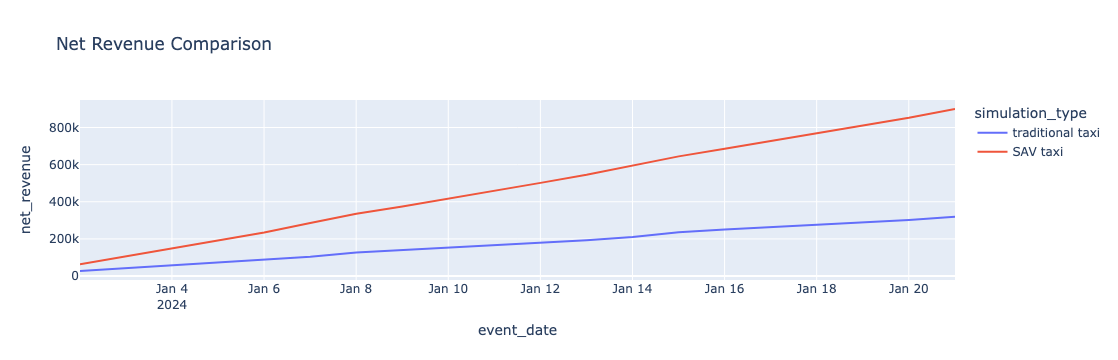

In [54]:
fig = px.line(df, x="event_date", y="net_revenue", title='Net Revenue Comparison', color='simulation_type')
fig.show()

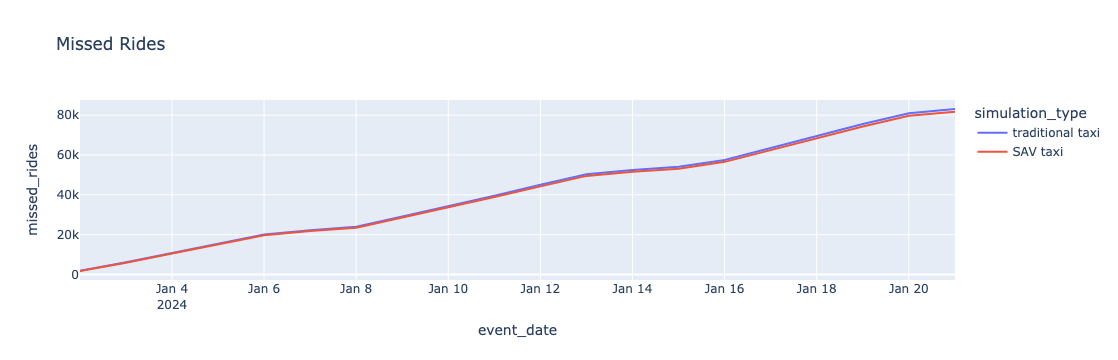

In [55]:
fig = px.line(df, x="event_date", y="missed_rides", title='Missed Rides', color='simulation_type')
fig.show()

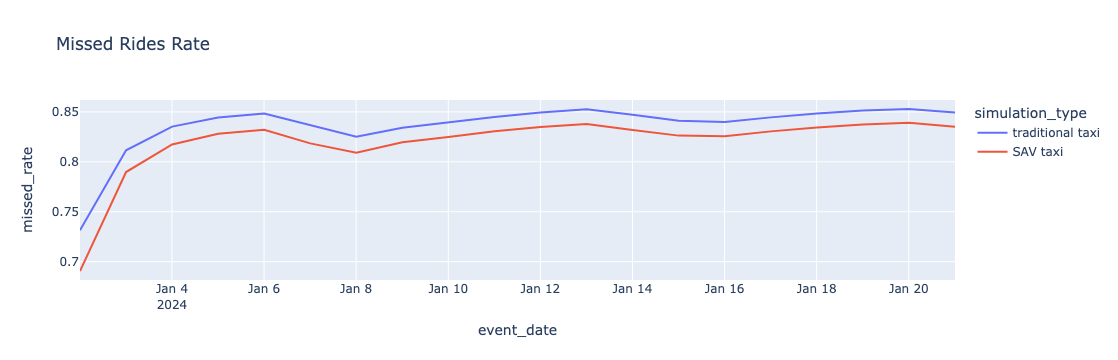

In [57]:
fig = px.line(df, x="event_date", y="missed_rate", title='Missed Rides Rate', color='simulation_type')
fig.show()

In [67]:
fleet_sizes = [50, 70, 100, 200, 500, 1000]

df = pd.DataFrame()

for size in fleet_sizes:
    df_sav = pd.read_csv(f'save_simulation_{size}.csv')
    df_trad = pd.read_csv(f'traditional_taxi_simulation_{size}.csv')

    df_trad['simulation_type'] = 'traditional taxi'
    df_sav['simulation_type'] = 'SAV taxi'

    res = pd.concat([df_trad, df_sav])
    res['fleet_size'] = size

    df = pd.concat([df, res])

In [68]:
df = df.groupby(['simulation_type', 'fleet_size']).agg(net_revenue=('net_revenue', 'sum'),
                                                      missed_rides=('missed_rides', 'sum'),
                                                      missed_rate=('missed_rate', 'median'),
                                                      ).reset_index()

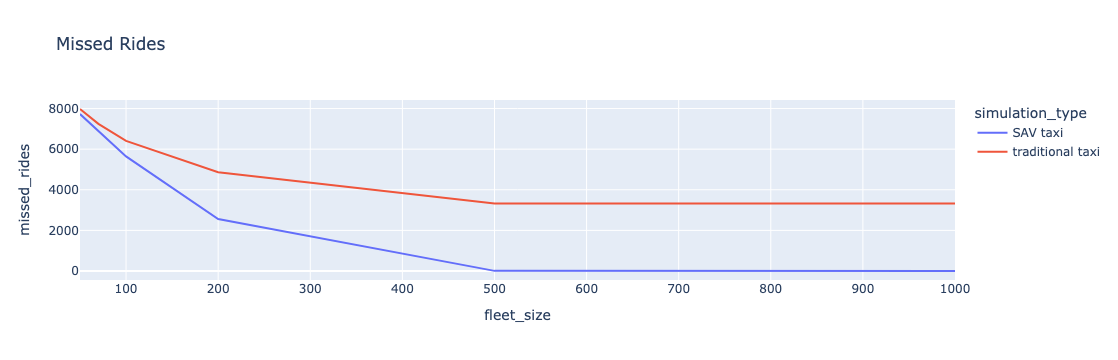

In [69]:
fig = px.line(df, x="fleet_size", y="missed_rides", title='Missed Rides', color='simulation_type')
fig.show()

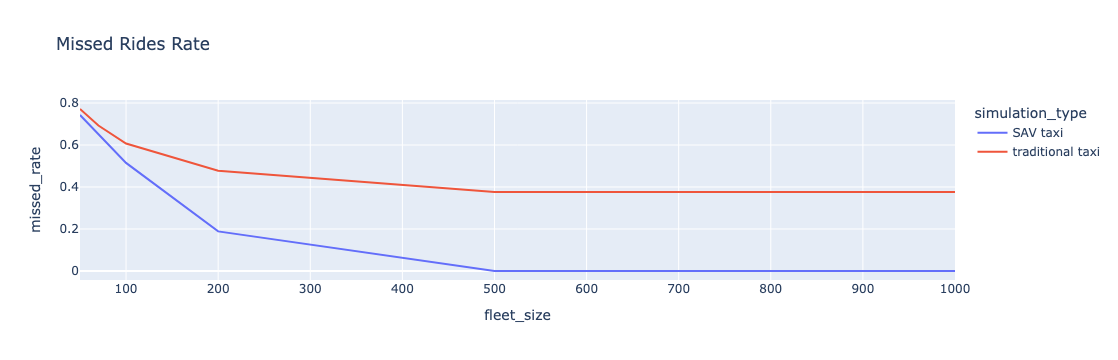

In [72]:
fig = px.line(df, x="fleet_size", y="missed_rate", title='Missed Rides Rate', color='simulation_type')
fig.show()

In [10]:
df_trad

,Unnamed: 0,net_revenue,missed_rides,co2_emissions,median_time_to_pickup,event_date
0,0,38158.24,1556,5727.7315,NaN,2024-01-02 00:05:00
1,0,60987.86,5545,10329.7725,NaN,2024-01-03 00:05:00
2,0,81897.90,10001,14643.9190,NaN,2024-01-04 00:05:00
3,0,101930.84,14508,18786.5565,NaN,2024-01-05 00:05:00
4,0,123421.80,18852,23083.3555,NaN,2024-01-06 00:05:00
5,0,151212.25,20685,27997.2390,NaN,2024-01-07 00:05:00
6,0,181989.24,22158,33330.8835,NaN,2024-01-08 00:05:00
7,0,201855.72,27076,37463.5395,NaN,2024-01-09 00:05:00
8,0,222135.64,31885,41496.2520,NaN,2024-01-10 00:05:00
9,0,241023.96,37039,45705.8585,NaN,2024-01-11 00:05:00


In [8]:
df

,Unnamed: 0,net_revenue,missed_rides,co2_emissions,median_time_to_pickup,event_date
0,0,63439.79,1763,1760.4162,NaN,2024-01-02 00:05:00
1,0,103348.05,6022,3068.9194,NaN,2024-01-03 00:05:00
2,0,129683.41,10956,3932.4120,NaN,2024-01-04 00:05:00
3,0,143834.89,16157,4404.9300,NaN,2024-01-05 00:05:00
4,0,151731.20,21338,4670.8962,NaN,2024-01-06 00:05:00
5,0,156488.21,24135,4817.2484,NaN,2024-01-07 00:05:00


In [5]:
# trips_table = pd.read_parquet('fhvhv_tripdata_2024-01 (1).parquet')
# trips_table.sample(10000).to_csv('sample.csv')
trips_table = pd.read_csv('sample.csv')

In [6]:
trips_table

,Unnamed: 0,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,...,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag
0,11019378,HV0003,B03404,B03404,2024-01-18 22:25:55,2024-01-18 22:27:29,2024-01-18 22:29:30,2024-01-18 22:35:54,36,37,...,0.86,0.00,0.0,0.0,5.97,N,N,N,N,N
1,5179762,HV0005,B03406,NaN,2024-01-09 21:04:40,NaN,2024-01-09 21:16:50,2024-01-09 21:23:28,200,200,...,0.72,0.00,0.0,3.0,5.47,N,N,N,N,N
2,1936565,HV0003,B03404,B03404,2024-01-04 16:01:38,2024-01-04 16:05:09,2024-01-04 16:05:33,2024-01-04 16:21:12,238,244,...,1.76,2.75,0.0,0.0,14.18,N,N,N,N,N
3,2884320,HV0003,B03404,B03404,2024-01-06 01:38:20,2024-01-06 01:41:03,2024-01-06 01:41:28,2024-01-06 01:46:42,79,137,...,0.73,2.75,0.0,0.0,6.41,N,N,N,N,Y
4,5287379,HV0003,B03404,B03404,2024-01-10 06:39:56,2024-01-10 06:42:29,2024-01-10 06:44:31,2024-01-10 07:37:11,63,230,...,4.95,2.75,0.0,0.0,46.03,N,N,N,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,18286500,HV0003,B03404,B03404,2024-01-29 17:17:19,2024-01-29 17:18:15,2024-01-29 17:18:33,2024-01-29 17:34:49,65,189,...,0.91,0.00,0.0,0.0,11.44,N,N,N,N,N
96,11358427,HV0003,B03404,B03404,2024-01-19 12:30:28,2024-01-19 12:37:01,2024-01-19 12:37:15,2024-01-19 12:58:57,221,118,...,2.03,0.00,0.0,0.0,23.79,Y,N,N,N,Y
97,12337298,HV0003,B03404,B03404,2024-01-20 18:28:19,2024-01-20 18:31:18,2024-01-20 18:31:28,2024-01-20 19:10:12,112,114,...,2.80,2.75,0.0,0.0,30.59,N,N,N,N,N
98,8448175,HV0005,B03406,NaN,2024-01-14 21:11:33,NaN,2024-01-14 21:14:44,2024-01-14 21:37:01,170,265,...,0.00,0.00,0.0,10.0,20.89,N,N,N,N,N


In [ ]:
trips_table.sample(100).to_csv('sample.csv')

In [13]:
trips_table = trips_table[trips_table['shared_request_flag'] == 'N']
trips_table = trips_table[trips_table['wav_request_flag'] == 'N']
trips_table = trips_table[trips_table['access_a_ride_flag'] == 'N'] 

In [38]:
trips_table.columns

Index(['hvfhs_license_num', 'dispatching_base_num', 'originating_base_num',
       'request_datetime', 'on_scene_datetime', 'pickup_datetime',
       'dropoff_datetime', 'PULocationID', 'DOLocationID', 'trip_miles',
       'trip_time', 'base_passenger_fare', 'tolls', 'bcf', 'sales_tax',
       'congestion_surcharge', 'airport_fee', 'tips', 'driver_pay',
       'shared_request_flag', 'shared_match_flag', 'access_a_ride_flag',
       'wav_request_flag', 'wav_match_flag'],
      dtype='object')

In [20]:
(trips_table['pickup_datetime'] - trips_table['request_datetime']).describe()

count                  18872924
mean     0 days 00:04:03.833627
std      0 days 00:03:11.087633
min           -1 days +23:18:42
25%             0 days 00:02:33
50%             0 days 00:03:37
75%             0 days 00:05:07
max             0 days 20:30:37
dtype: object

In [22]:
trips_table = trips_table[trips_table['request_datetime'] > trips_table['pickup_datetime']]

In [31]:
trips_table.columns

Index(['hvfhs_license_num', 'dispatching_base_num', 'originating_base_num',
       'request_datetime', 'on_scene_datetime', 'pickup_datetime',
       'dropoff_datetime', 'PULocationID', 'DOLocationID', 'trip_miles',
       'trip_time', 'base_passenger_fare', 'tolls', 'bcf', 'sales_tax',
       'congestion_surcharge', 'airport_fee', 'tips', 'driver_pay',
       'shared_request_flag', 'shared_match_flag', 'access_a_ride_flag',
       'wav_request_flag', 'wav_match_flag'],
      dtype='object')

In [32]:
# filtering outliers
trips_table = trips_table[(trips_table['trip_time'] >= trips_table['trip_time'].quantile(0.05)) \
                    & (trips_table['trip_time'] <= trips_table['trip_time'].quantile(0.95)) \
                    & (trips_table['trip_miles'] >= trips_table['trip_miles'].quantile(0.05)) \
                    & (trips_table['trip_miles'] <= trips_table['trip_miles'].quantile(0.95)) \
                    ]

In [36]:
trips_table['base_passenger_fare'].describe()

count    153707.000000
mean         40.710398
std          22.060257
min           0.000000
25%          23.200000
50%          39.040000
75%          52.750000
max         255.750000
Name: base_passenger_fare, dtype: float64

In [127]:
trips_table['trip_id'] = [str(uuid.uuid4()) for _ in range(len(trips_table))]

/var/folders/xs/_0l9xrzj3tz9bsyngdnyxmhr0000gn/T/ipykernel_16744/3005511810.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trips_table['trip_id'] = [str(uuid.uuid4()) for _ in range(len(trips_table))]


# 1. Simulation

## 1. 1. Intitial values

In [142]:
fleet_size = 50

charging_time = 60 * 60   # time to charge fo a full battery in seconds
distance_per_charge = 300  # range a car that travle on full battery in km
speed_of_charging = distance_per_charge

charging_stations_count = 10
charging_station_capacity = 5
electricity_consumption_per_km = 1  # in units of battery level consumed per km
max_wait_time = 900  # Maximum wait time for a trip in seconds (15 minutes)
co2_per_km = 0.2  # CO2 emissions in kg per km for traditional taxis


# mean distance and time between locations (used to calculate eta)
# can be also devided by traffic/ or high/low demand - next step for enhancement
mean_distance_time = trips_table.groupby(['PULocationID', 'DOLocationID']).agg({
    'trip_time': 'mean',
    'trip_miles': 'mean'
}).reset_index()

# initialize charging stations within each location_id
max_location_id = trips_table["PULocationID"].max()

charging_stations = pd.DataFrame({
    "location_id": random.choices(range(1, max_location_id + 1), k=charging_stations_count),
    "occupied_slot": [[0 for _ in range(charging_station_capacity)] for _ in range(charging_stations_count)],
    "waiting_to_be_charged": [[] for _ in range(charging_stations_count)],
    "estimated_time_to_charge": [[0 for _ in range(charging_station_capacity)] for _ in range(charging_stations_count)],
    "station_id": [str(uuid.uuid4()) for _ in range(charging_stations_count)]
    
})


# Initialize Fleet
fleet = pd.DataFrame({
    "location_id": random.choices(range(1, max_location_id + 1), k=fleet_size),
    "battery_level": [distance_per_charge] * fleet_size,  # Full battery
    "status": ["idle"] * fleet_size,  # idle, en_route_to_client, en_route_with_client, charging
    "current_trip_id": [None] * fleet_size,
    "eta_to_pickup": [0] * fleet_size,  # Estimated time to pickup
    "car_id": [str(uuid.uuid4()) for _ in range(len(fleet))]
})

## 1.2. Functions

In [146]:
def assign_rides(trips_data, current_time):
    """Assign cars to trips based on proximity, battery level, and wait time."""
    for idx, trip in trips_data.iterrows():
        if trip["assigned"] or (current_time - trip["request_datetime"]).total_seconds() > max_wait_time:
            continue

        required_battery = trip["trip_distance"] * electricity_consumption_per_km

        available_cars = fleet[(fleet["status"] == "idle") & (fleet["battery_level"] > required_battery)].copy()
        
        pick_up_location = trip['PULocationID']
        available_cars = available_cars.merge(mean_distance_time[mean_distance_time['DOLocationID'] == pick_up_location], 
                             left_on='location_id', 
                             right_on='PULocationID').rename(columns={'trip_time': 'eta_to_pickup',
                                                                     'trip_miles': 'miles_to_pickup'})
        
        # additional filtereing by consumption of battery needed to pickup client
        available_cars['required_battery_to_pickup_client'] = available_cars['miles_to_pickup'] * electricity_consumption_per_km
        available_cars['required_batter_to_make_trip'] = available_cars['required_battery_to_pickup_client'] + required_battery
        available_cars = available_cars[available_cars['battery_level'] > available_cars['required_batter_to_make_trip']]

        
        if available_cars.empty:
            continue

        closest_car = available_cars.nsmallest(1, "miles_to_pickup").iloc[0]

        # Assign car to the trip
        fleet.loc[closest_car.name, "status"] = "en_route_to_client"
        fleet.loc[closest_car.name, "current_trip_id"] = trip['trip_id']
        fleet.loc[closest_car.name, "eta_to_pickup"] = current_time + timedelta(seconds=closest_car['eta_to_pickup'])
        fleet.loc[closest_car.name, "battery_level"] -= closest_car['required_batter_to_make_trip']
        trips_data.loc[idx, "assigned"] = True

In [147]:
def update_car_status(trips_data, current_time):
    """Update car statuses and handle charging."""
    
    for idx, car in fleet.iterrows():
        if car["status"] == "en_route_to_client" and current_time >= car["eta_to_pickup"]:
            continue

        if car["status"] == "en_route_with_client":
            trip = trips_data[trips_data['trip_id'] == car["current_trip_id"]]
            if current_time >= trip["dropoff_datetime"]:
                fleet.loc[idx, "location_id"] = trip["DOLocationID"]
                fleet.loc[idx, "status"] = "idle"
                fleet.loc[idx, "current_trip_id"] = None

        if car["status"] == "charging":
            fleet.loc[idx, "battery_level"] += speed_of_charging  # Increment charging
            station_id = car["charging_station_id"]
            
            charging_station_idx = charging_stations[charging_stations['station_id'] == station_id].index[0]
            charging_station = charging_stations[charging_stations['station_id'] == station_id].iloc[0]
            
            charging_slot = charging_station['occupied_slot'].index(car['car_id'])
            charging_stations.loc[charging_station_idx, 'estimated_time_to_charge'][charging_slot] -= car['battery_level'] / speed_of_charging

            if car["battery_level"] >= distance_per_charge:
                fleet.loc[idx, "status"] = "idle"
                charging_stations.loc[charging_station_idx, 'occupied_slot'][charging_slot] = 0
                charging_stations.loc[charging_station_idx, 'estimated_time_to_charge'][charging_slot] = 0
                
                if charging_station["waiting_to_be_charged"]:
                    next_car = charging_station.loc[charging_station_idx, "waiting_to_be_charged"].pop(0)
                    charging_stations.loc[charging_station_idx, 'occupied_slot'][charging_slot] = next_car
                    charging_stations.loc[charging_station_idx, 'estimated_time_to_charge'][charging_slot] = charging_time


        if car["battery_level"] <= 20 and car["status"] == "idle":
            assign_to_charging(idx)

In [148]:
def assign_to_charging(car_id):
    """Assign car to the nearest available charging station."""
    available_stations = charging_stations.copy()

    car_location = fleet[fleet['car_id'] == car_id]
    
    available_stations = available_stations.merge(mean_distance_time[mean_distance_time['POLocationID'] == car_location], 
                             left_on='location_id', 
                             right_on='DOLocationID').rename(columns={'trip_time': 'trip_time_to_charger',
                                                                     'trip_miles': 'trip_miles_to_charger'})
    
    available_stations['required_battery_to_station'] = available_stations['trip_miles_to_charger'] * electricity_consumption_per_km
    available_stations = available_stations[available_stations['required_battery_to_station'] <\
                                                    fleet[fleet['car_id'] == car_id]['battery_level'].iloc[0]]
    
    available_stations["estimated_wait_time"] = available_stations['estimated_time_to_charge'].apply(lambda x: sum(x))
    

    available_stations["estimated_wait_time_to_charge"] = available_stations["trip_time_to_charger"] + available_stations["estimated_wait_time"]
    best_station = available_stations.nsmallest(1, "estimated_wait_time_to_charge").iloc[0]
    best_station_idx = best_station.index[0]
    
    try:
        empty_slot = best_station['occupied_slot'].index(0)
        fleet.loc[car_id, "status"] = "charging"
        fleet.loc[car_id, "charging_station_id"] = station_id

        
        charging_stations.loc[best_station_idx, 'occupied_slot'][empty_slot] = car_id
        charging_stations.loc[best_station_idx, 'estimated_time_to_charge'][empty_slot] = charging_time
        
    except:
        charging_stations.loc[best_station_idx, 'waiting_to_be_charged'].append(car_id)

7